In this workshop we will predecting the price of used cars using machine learning models, this is a regression machine learning problem.

Importing the Dependencies

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder # to encode non numeric values since we don't have a lot of categories 


Data description

This dataset contains information about used cars listed on www.cardekho.com
This data can be used for a lot of purposes such as price prediction.

Data set : https://www.kaggle.com/datasets/manoranjankrthakur/cardekho 


Data Collection and Processing

In [3]:
# loading the data from csv file to pandas dataframe
df =  pd.read_csv('car data.csv')


In [4]:
# inspecting the first 5 rows of the dataframe
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# checking the number of rows and columns
df.shape

(301, 9)

In [11]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
# checking the number of missing values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
# checking the distribution of categorical data
print(df["Car_Name"].value_counts())
print(df["Fuel_Type"].value_counts())
print(df["Seller_Type"].value_counts())
print(df["Transmission"].value_counts())

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [15]:
enc = LabelEncoder()
# encoding "Fuel_Type" Column

enc.fit(df['Fuel_Type'])
df['Fuel_Type'] = enc.transform(df['Fuel_Type'])

# encoding "Seller_Type" Column

enc.fit(df['Seller_Type'])
df['Seller_Type'] = enc.transform(df['Seller_Type'])
# encoding "Transmission" Column
enc.fit(df['Transmission'])
df['Transmission'] = enc.transform(df['Transmission'])

In [18]:
df.head(-13)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
283,city,2016,8.99,11.80,9010,2,0,1,0
284,brio,2013,3.50,5.90,9800,2,0,1,0
285,jazz,2016,7.40,8.50,15059,2,0,0,0
286,jazz,2016,5.65,7.90,28569,2,0,1,0


Splitting the data and Target

In [20]:
y = df["Selling_Price"]
features=["Year","Present_Price",	"Kms_Driven",	"Fuel_Type",	"Seller_Type",	"Transmission",	"Owner"] 
x = df[features]

In [21]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          2            0             1   
1    2013           9.54       43000          1            0             1   
2    2017           9.85        6900          2            0             1   
3    2011           4.15        5200          2            0             1   
4    2014           6.87       42450          1            0             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             1   
297  2015           5.90       60000          2            0             1   
298  2009          11.00       87934          2            0             1   
299  2017          12.50        9000          1            0             1   
300  2016           5.90        5464          2            0             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [22]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


<AxesSubplot:>

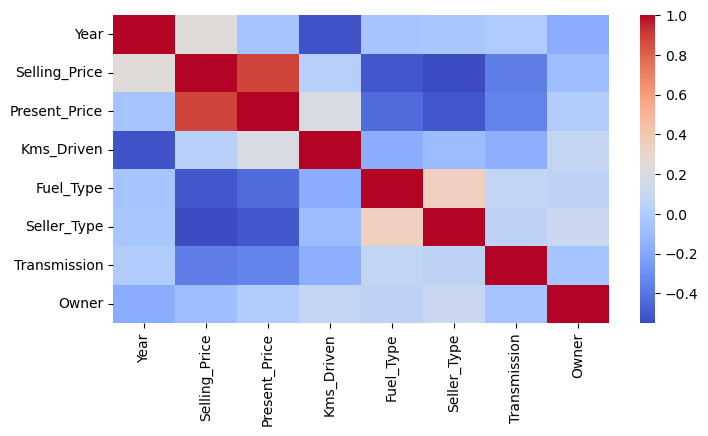

In [31]:
# to see the correlation between variables 
plt.subplots(figsize=(8,4))
sns.heatmap(np.round(df.corr(),2), cmap = 'coolwarm')

Splitting Training and Test data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.4)

Model Training

1. Linear Regression

In [25]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [26]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

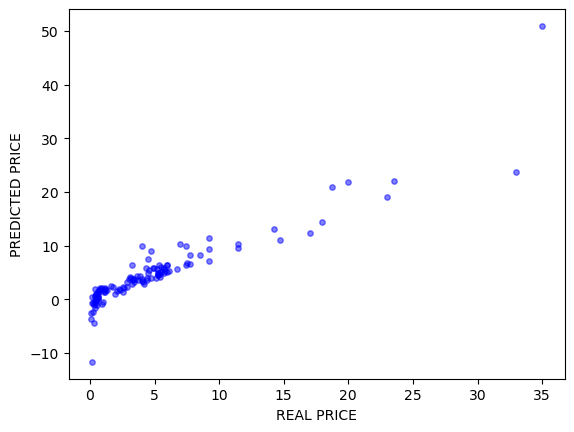

In [28]:
# prediction on Training data
predY = lin_reg_model.predict(X_test)
plt.scatter(Y_test,predY,c = 'blue', s=15, alpha=0.5)
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()

In [34]:
# correlation between the actual and the predicted result 
pd.Series((y)).corr(pd.Series(predY))

-0.13609432259838636

In [35]:
# R squared Error
print("R squared", metrics.r2_score(Y_test,predY))

R squared 0.8223478027894192


Visualize the actual prices and Predicted prices

2. Lasso Regression

In [46]:
# loading the linear regression model, use lasso()

lasso=Lasso()



In [48]:

lasso.fit(x,y)

Lasso()

Model Evaluation

In [49]:
# prediction on Training data
predY_lasso = lasso.predict(X_test)


In [50]:
print("R squared", metrics.r2_score(Y_test,predY_lasso)) 

R squared 0.8515588141741726


Visualize the actual prices and Predicted prices

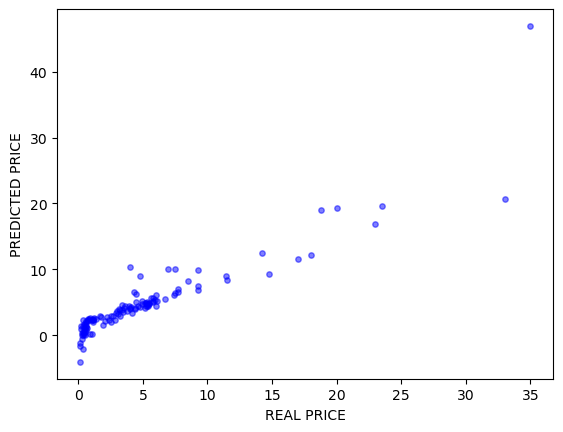

In [51]:
plt.scatter(Y_test,predY_lasso,c = 'blue', s=15, alpha=0.5)
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()

In [54]:
# models performance
print('Model                 R squared error')
print('Linear Regression     ', metrics.r2_score(Y_test,predY))
print('Lasso regression      ', metrics.r2_score(Y_test,predY_lasso))

Model                 R squared error
Linear Regression      0.8223478027894192
Lasso regression       0.8515588141741726
